# Import Package

In [44]:
import numpy as np
import pandas as pd
from funk_svd import SVD
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from funk_svd import SVD  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Read txt File

In [ ]:
import csv

input_file_path = '/Users/yufang/Desktop/Netflix Project/combined_data_1.txt' 
output_file_path = 'movies_rating1.csv'  

data = []
current_movie_id = None

# Read input file
with open(input_file_path, 'r') as file:
    for line in file:
        line = line.strip()

        if line.endswith(':'):
            current_movie_id = line[:-1]  # get movie id
        else:
            user_id, rating, date = line.split(',')
            data.append([current_movie_id, user_id, rating, date])

with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['movie_id', 'user_id', 'rating', 'date'])
    writer.writerows(data)

print(f"Write data '{input_file_path}' to '{output_file_path}")


Write data '/Users/yufang/Desktop/Netflix Project/combined_data_1.txt' to 'movies_rating1.csv


In [ ]:
input_file_path = '/Users/yufang/Desktop/Netflix Project/combined_data_2.txt' 
output_file_path = 'movies_rating2.csv'  

data = []
current_movie_id = None

# Read input file
with open(input_file_path, 'r') as file:
    for line in file:
        line = line.strip()

        if line.endswith(':'):
            current_movie_id = line[:-1]  # get movie id
        else:
            user_id, rating, date = line.split(',')
            data.append([current_movie_id, user_id, rating, date])

with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['movie_id', 'user_id', 'rating', 'date'])
    writer.writerows(data)
print(f"Write data '{input_file_path}' to '{output_file_path}")

Write data '/Users/yufang/Desktop/Netflix Project/combined_data_2.txt' to 'movies_rating2.csv


In [ ]:
input_file_path = '/Users/yufang/Desktop/Netflix Project/combined_data_3.txt' 
output_file_path = 'movies_rating3.csv'  

data = []
current_movie_id = None

# Read input file
with open(input_file_path, 'r') as file:
    for line in file:
        line = line.strip()

        if line.endswith(':'):
            current_movie_id = line[:-1]  # get movie id
        else:
            user_id, rating, date = line.split(',')
            data.append([current_movie_id, user_id, rating, date])

with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['movie_id', 'user_id', 'rating', 'date'])
    writer.writerows(data)
    
print(f"Write data '{input_file_path}' to '{output_file_path}")

Write data '/Users/yufang/Desktop/Netflix Project/combined_data_3.txt' to 'movies_rating3.csv


In [ ]:
input_file_path = '/Users/yufang/Desktop/Netflix Project/combined_data_4.txt' 
output_file_path = 'movies_rating4.csv'  

data = []
current_movie_id = None

# Read input file
with open(input_file_path, 'r') as file:
    for line in file:
        line = line.strip()

        if line.endswith(':'):
            current_movie_id = line[:-1]  # get movie id
        else:
            user_id, rating, date = line.split(',')
            data.append([current_movie_id, user_id, rating, date])

with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['movie_id', 'user_id', 'rating', 'date'])
    writer.writerows(data)
print(f"Write data '{input_file_path}' to '{output_file_path}")

Write data '/Users/yufang/Desktop/Netflix Project/combined_data_4.txt' to 'movies_rating4.csv


# Data Preparation

In [3]:
movie_title = pd.read_csv('movie_titles.csv', header=None,delimiter='\t', names=['Combined'], encoding='latin1')
movie_title[['ID', 'Year', 'Title']] = movie_title['Combined'].str.split(',', n=2, expand=True)
movie_title = movie_title.drop(columns=['Combined'])

In [4]:
movie_rating1 = pd.read_csv('movies_rating1.csv')
movie_rating2 = pd.read_csv('movies_rating2.csv')
movie_rating3 = pd.read_csv('movies_rating3.csv')
movie_rating4 = pd.read_csv('movies_rating4.csv')

In [5]:
movie_rating = pd.concat([movie_rating1, movie_rating2, movie_rating3, movie_rating4])

In [6]:
movie_rating['date'] = pd.to_datetime(movie_rating['date'])

In [7]:
movie_rating.sort_values(by='date', inplace=True)
print(len(movie_rating))

100480507


In [8]:
movie_title['ID'] = movie_title['ID'].astype('int64')
movie = movie_rating.merge(movie_title, left_on='movie_id', right_on='ID', how='left')
movie = movie.drop(columns=['ID'])
print(len(movie))

100480507


# Train-test split

In [9]:
movie_slice = movie.iloc[-180000:] # get last 180000 entries
print(len(movie_slice))

180000


In [11]:
test = movie_slice[160000:]
test

,movie_id,user_id,rating,date,Year,Title
100460507,16445,1250138,2,2005-12-31,2003,"House of 1,000 Corpses"
100460508,6850,714682,1,2005-12-31,2005,Lords of Dogtown
100460509,3441,859907,2,2005-12-31,2005,Kicking & Screaming
100460510,10748,2373473,3,2005-12-31,1987,Hamburger Hill
100460511,5496,1678873,2,2005-12-31,2004,"I, Robot"
...,...,...,...,...,...,...
100480502,8993,2183787,4,2005-12-31,2005,Family Guy Presents: Stewie Griffin: The Untol...
100480503,7430,258170,4,2005-12-31,2001,Six Feet Under: Season 1
100480504,8467,1534359,5,2005-12-31,1996,Eraser
100480505,10168,2543295,2,2005-12-31,2003,The League of Extraordinary Gentlemen


In [12]:
train = movie_slice[:160000]
train

,movie_id,user_id,rating,date,Year,Title
100300507,17147,427460,4,2005-12-29,1996,She's the One
100300508,4353,1605111,5,2005-12-29,2002,Curb Your Enthusiasm: Season 3
100300509,3923,13949,3,2005-12-29,1997,Beverly Hills Ninja
100300510,6874,200779,3,2005-12-29,2003,The Cooler
100300511,12582,851475,4,2005-12-29,2003,Mystic River
...,...,...,...,...,...,...
100460502,13629,1318034,4,2005-12-31,1951,Alice in Wonderland
100460503,17324,1719503,4,2005-12-31,2005,Hitch
100460504,17324,22846,5,2005-12-31,2005,Hitch
100460505,3860,1799620,2,2005-12-31,2003,Bruce Almighty


In [13]:
from sklearn.model_selection import train_test_split
# Split the train (180000 entries) into individual train(50%) and ensemble train(50%)
individual_train, ensemble_train = train_test_split(train, test_size=0.5, random_state=42)
print(len(individual_train)) # individual train used to fit single model
print(len(ensemble_train)) # ensemble train used to predict ratings

80000
80000


In [14]:
# Create train_svd and test_svd for model fitting
# Create X_train_svd and y_train_svd for GridSearchCV
X_train_svd = individual_train[['user_id', 'movie_id']].rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
y_train_svd = individual_train['rating']
train_svd = X_train_svd.copy()
train_svd['rating'] = y_train_svd
test_svd = test.rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
print(len(train_svd))
print(len(test_svd))

80000
20000


# Validation

In [27]:
train_validation = individual_train[:64000]
train_validation # training dataset during the validation process

,movie_id,user_id,rating,date,Year,Title
100352738,15582,1386463,3,2005-12-29,2002,Sweet Home Alabama
100355871,9087,1380250,3,2005-12-29,1992,Hero
100333810,16793,2188505,3,2005-12-29,1973,The Exorcist
100328237,5762,1109774,2,2005-12-29,2000,Almost Famous
100417466,10072,1067658,3,2005-12-30,2004,Prime Suspect 6
...,...,...,...,...,...,...
100310522,7879,40960,3,2005-12-29,2002,Super Troopers
100360876,6274,240400,3,2005-12-30,1990,The Hunt for Red October
100336213,16796,2026731,5,2005-12-29,2001,Brian's Song
100325730,357,649154,4,2005-12-29,2003,House of Sand and Fog


In [28]:
test_validation = individual_train[64000:]
test_validation # testing dataset during the validation process

,movie_id,user_id,rating,date,Year,Title
100312091,6833,793778,5,2005-12-29,1995,Billy Madison
100442339,16784,1663055,3,2005-12-31,2005,The Sisterhood of the Traveling Pants
100344184,5496,2397099,4,2005-12-29,2004,"I, Robot"
100350985,10906,1208781,2,2005-12-29,2004,Cellular
100429333,17154,1489446,5,2005-12-30,1993,Philadelphia
...,...,...,...,...,...,...
100420386,2457,71480,2,2005-12-30,2004,A Cinderella Story
100404201,11089,2300374,4,2005-12-30,2001,"Monsters, Inc."
100432439,6134,2610903,4,2005-12-30,2004,Collateral
100447374,5762,1784540,4,2005-12-31,2000,Almost Famous


In [29]:
# Create training dataset for svd validation
# Create testing dataset for svd validation
X_train_svd_validation = train_validation[['user_id', 'movie_id']].rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
y_train_svd_validation = train_validation['rating']
train_svd_validation = X_train_svd_validation.copy()
train_svd_validation['rating'] = y_train_svd_validation
test_svd_validation = test_validation.rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
print(len(train_svd_validation))
print(len(test_svd_validation))

64000
16000


In [30]:
# Validaiton process
best_rmse = np.inf
best_params = None
reg_values = [0.1, 1, 10, 50, 100]
epoch_values = [10, 20, 30, 40, 50]
factor_values = [1, 10, 20, 50, 100]
shuffle_or_not = [True, False]

for factors in factor_values:
    for epochs in epoch_values:
        for regs in reg_values:
            for shuffle_my in shuffle_or_not:
                model = SVD(lr=0.005, reg=regs, n_epochs=epochs, n_factors=factors,
                    early_stopping=True, shuffle=shuffle_my, min_rating=1, max_rating=5)
                model.fit(train_svd_validation) 
                pred = model.predict(test_svd_validation) 
                rmse = np.sqrt(mean_squared_error(test_svd_validation['rating'], pred))
                if (rmse < best_rmse):
                    best_rmse = rmse
                    best_params = [0.005, regs, epochs, factors, True, shuffle_my, 1, 5]

Preprocessing data...

Epoch 1/10  | took 0.0 sec
Epoch 2/10  | took 0.0 sec
Epoch 3/10  | took 0.0 sec
Epoch 4/10  | took 0.0 sec
Epoch 5/10  | took 0.0 sec
Epoch 6/10  | took 0.0 sec
Epoch 7/10  | took 0.0 sec
Epoch 8/10  | took 0.0 sec
Epoch 9/10  | took 0.0 sec
Epoch 10/10 | took 0.0 sec

Training took 0 sec
Preprocessing data...

Epoch 1/10  | took 0.0 sec
Epoch 2/10  | took 0.0 sec
Epoch 3/10  | took 0.0 sec
Epoch 4/10  | took 0.0 sec
Epoch 5/10  | took 0.0 sec
Epoch 6/10  | took 0.0 sec
Epoch 7/10  | took 0.0 sec
Epoch 8/10  | took 0.0 sec
Epoch 9/10  | took 0.0 sec
Epoch 10/10 | took 0.0 sec

Training took 0 sec
Preprocessing data...

Epoch 1/10  | took 0.2 sec
Epoch 2/10  | took 0.0 sec
Epoch 3/10  | took 0.0 sec
Epoch 4/10  | took 0.0 sec
Epoch 5/10  | took 0.0 sec
Epoch 6/10  | took 0.0 sec
Epoch 7/10  | took 0.0 sec
Epoch 8/10  | took 0.0 sec
Epoch 9/10  | took 0.0 sec
Epoch 10/10 | took 0.0 sec

Training took 0 sec
Preprocessing data...

Epoch 1/10  | took 0.0 sec
Epoch 2/

In [41]:
print(best_rmse)

0.9331917800356081


In [52]:
print(best_params)

[0.005, 0.1, 40, 1, True, False, 1, 5]


# Model Fit & Results

In [33]:
# Optimal parameters found through validation
svd = SVD(lr=0.005, reg=0.1, n_epochs=40, n_factors=1,
          early_stopping=True, shuffle=False, min_rating=1, max_rating=5)
svd.fit(train_svd)

Preprocessing data...

Epoch 1/40  | took 0.0 sec
Epoch 2/40  | took 0.0 sec
Epoch 3/40  | took 0.0 sec
Epoch 4/40  | took 0.0 sec
Epoch 5/40  | took 0.0 sec
Epoch 6/40  | took 0.0 sec
Epoch 7/40  | took 0.0 sec
Epoch 8/40  | took 0.0 sec
Epoch 9/40  | took 0.0 sec
Epoch 10/40 | took 0.0 sec
Epoch 11/40 | took 0.0 sec
Epoch 12/40 | took 0.0 sec
Epoch 13/40 | took 0.0 sec
Epoch 14/40 | took 0.0 sec
Epoch 15/40 | took 0.0 sec
Epoch 16/40 | took 0.0 sec
Epoch 17/40 | took 0.0 sec
Epoch 18/40 | took 0.0 sec
Epoch 19/40 | took 0.0 sec
Epoch 20/40 | took 0.0 sec
Epoch 21/40 | took 0.0 sec
Epoch 22/40 | took 0.0 sec
Epoch 23/40 | took 0.0 sec
Epoch 24/40 | took 0.0 sec
Epoch 25/40 | took 0.0 sec
Epoch 26/40 | took 0.0 sec
Epoch 27/40 | took 0.0 sec
Epoch 28/40 | took 0.0 sec
Epoch 29/40 | took 0.0 sec
Epoch 30/40 | took 0.0 sec
Epoch 31/40 | took 0.0 sec
Epoch 32/40 | took 0.0 sec
Epoch 33/40 | took 0.0 sec
Epoch 34/40 | took 0.0 sec
Epoch 35/40 | took 0.0 sec
Epoch 36/40 | took 0.0 sec
Epoch

In [34]:
pred = svd.predict(test_svd)
rmse = np.sqrt(mean_squared_error(test_svd['rating'], pred))
print(f'Test RMSE: {rmse:.15f}')

Test RMSE: 0.925532551734693


# Predictions

In [35]:
X_train_svd_ensemble = ensemble_train[['user_id', 'movie_id']].rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
y_train_svd_ensemble = ensemble_train['rating']
train_svd_ensemble = X_train_svd_ensemble.copy()
train_svd_ensemble['rating'] = y_train_svd_ensemble
test_svd_ensemble = test.rename(columns={'user_id': 'u_id', 'movie_id': 'i_id'})
print(len(train_svd_ensemble)) # train_svd_ensemble used to predict ratings for train set
print(len(test_svd_ensemble)) # test_svd_ensemble used to predict ratings for test set

80000
20000


In [36]:
pred = svd.predict(train_svd_ensemble)
pred

[np.float64(3.7552367333146806),
 np.float64(4.700146983108377),
 np.float64(3.552831786360411),
 np.float64(4.52763382507107),
 np.float64(4.4847769742760795),
 np.float64(4.649197107793624),
 np.float64(2.523793971347439),
 np.float64(3.357953334987416),
 np.float64(3.5695830774039337),
 np.float64(3.8278096590757973),
 np.float64(3.5714511550419608),
 np.float64(3.876636721510831),
 np.float64(3.3767550368731833),
 np.float64(3.3783851309321),
 np.float64(3.11838051275856),
 np.float64(3.709650898179589),
 np.float64(4.679780197561812),
 np.float64(3.2000519156081735),
 np.float64(3.840207758416594),
 np.float64(3.128843426164721),
 np.float64(3.849737172195895),
 np.float64(4.15784388232392),
 np.float64(2.7530262539281947),
 np.float64(3.8020311126973865),
 np.float64(4.475139409107285),
 np.float64(4.479031510483444),
 np.float64(3.116952300091777),
 np.float64(2.965246978851591),
 np.float64(2.8869660955268652),
 np.float64(2.7467919356814576),
 np.float64(4.240884661677799),
 n

In [37]:
pred_array = np.array(pred)
train_pred = pd.DataFrame(pred_array, columns=['predicted_rating_funk_svd'])
train_pred.to_csv('predicted_rating_funk_svd_train.csv', index=False)


In [38]:
pred_test = svd.predict(test_svd_ensemble)
pred_test

[np.float64(2.385603877078584),
 np.float64(3.234209563250452),
 np.float64(3.057452759442252),
 np.float64(3.1347860232141986),
 np.float64(3.553985573473279),
 np.float64(3.2809260314241713),
 np.float64(3.1039204563762763),
 np.float64(3.2475176669155608),
 np.float64(2.4517214126269016),
 np.float64(3.748118733321271),
 np.float64(4.205269649695638),
 np.float64(3.935002484274812),
 np.float64(2.999790106227956),
 np.float64(3.3174922226260506),
 np.float64(3.5226878488146407),
 np.float64(3.965778026372542),
 np.float64(4.383249823439033),
 np.float64(3.358412896934211),
 np.float64(3.0712702110147583),
 np.float64(3.6987339017757166),
 np.float64(3.5021516762506835),
 np.float64(1.9496043205274767),
 np.float64(3.521609586346848),
 np.float64(3.5506098887190745),
 np.float64(3.4520298085391166),
 np.float64(3.4830892813734065),
 np.float64(4.103919943111459),
 np.float64(4.3871562995777715),
 np.float64(3.828244842455889),
 np.float64(3.2506359784608865),
 np.float64(3.4730079736

In [39]:
pred_array_test = np.array(pred_test)
test_pred = pd.DataFrame(pred_array_test, columns=['predicted_rating_funk_svd'])
test_pred.to_csv('predicted_rating_funk_svd_test.csv', index=False)

# Experiments

In [42]:
reg_values = [0.1, 1, 10, 50, 100]
rmse_reg = []
lr_fixed = 0.005
epoch_fixed = 40
factor_fixed = 1
for reg in reg_values:
    model = SVD(lr=lr_fixed, reg=reg, n_epochs=epoch_fixed, n_factors=factor_fixed,
          early_stopping=True, shuffle=False, min_rating=1, max_rating=5)
    model.fit(train_svd)
    pred = model.predict(test_svd)
    rmse = np.sqrt(mean_squared_error(test_svd['rating'], pred))
    rmse_reg.append(rmse)

Preprocessing data...

Epoch 1/40  | took 0.0 sec
Epoch 2/40  | took 0.0 sec
Epoch 3/40  | took 0.0 sec
Epoch 4/40  | took 0.0 sec
Epoch 5/40  | took 0.0 sec
Epoch 6/40  | took 0.0 sec
Epoch 7/40  | took 0.0 sec
Epoch 8/40  | took 0.0 sec
Epoch 9/40  | took 0.0 sec
Epoch 10/40 | took 0.0 sec
Epoch 11/40 | took 0.0 sec
Epoch 12/40 | took 0.0 sec
Epoch 13/40 | took 0.0 sec
Epoch 14/40 | took 0.0 sec
Epoch 15/40 | took 0.0 sec
Epoch 16/40 | took 0.0 sec
Epoch 17/40 | took 0.0 sec
Epoch 18/40 | took 0.0 sec
Epoch 19/40 | took 0.0 sec
Epoch 20/40 | took 0.0 sec
Epoch 21/40 | took 0.0 sec
Epoch 22/40 | took 0.0 sec
Epoch 23/40 | took 0.0 sec
Epoch 24/40 | took 0.0 sec
Epoch 25/40 | took 0.0 sec
Epoch 26/40 | took 0.0 sec
Epoch 27/40 | took 0.0 sec
Epoch 28/40 | took 0.0 sec
Epoch 29/40 | took 0.0 sec
Epoch 30/40 | took 0.0 sec
Epoch 31/40 | took 0.0 sec
Epoch 32/40 | took 0.0 sec
Epoch 33/40 | took 0.0 sec
Epoch 34/40 | took 0.0 sec
Epoch 35/40 | took 0.0 sec
Epoch 36/40 | took 0.0 sec
Epoch

In [43]:
rmse_reg

[np.float64(0.9255404381263939),
 np.float64(0.9503390161443918),
 np.float64(1.035202197222648),
 np.float64(1.0588154373821748),
 np.float64(1.0623251544835008)]

In [47]:
epoch_values = [10, 20, 30, 40, 50]
rmse_epochs = []
lr_fixed = 0.005
reg_fixed = 0.1
factor_fixed = 1

for epochs in epoch_values:
    model = SVD(lr=lr_fixed, reg=reg_fixed, n_epochs=epochs, n_factors=factor_fixed,
                early_stopping=True, shuffle=False, min_rating=1, max_rating=5)
    model.fit(train_svd) 
    pred = model.predict(test_svd)  
    rmse = np.sqrt(mean_squared_error(test_svd['rating'], pred))
    rmse_epochs.append(rmse)



Preprocessing data...

Epoch 1/10  | took 0.0 sec
Epoch 2/10  | took 0.0 sec
Epoch 3/10  | took 0.0 sec
Epoch 4/10  | took 0.0 sec
Epoch 5/10  | took 0.0 sec
Epoch 6/10  | took 0.0 sec
Epoch 7/10  | took 0.0 sec
Epoch 8/10  | took 0.0 sec
Epoch 9/10  | took 0.0 sec
Epoch 10/10 | took 0.0 sec

Training took 0 sec
Preprocessing data...

Epoch 1/20  | took 0.0 sec
Epoch 2/20  | took 0.0 sec
Epoch 3/20  | took 0.0 sec
Epoch 4/20  | took 0.0 sec
Epoch 5/20  | took 0.0 sec
Epoch 6/20  | took 0.0 sec
Epoch 7/20  | took 0.0 sec
Epoch 8/20  | took 0.0 sec
Epoch 9/20  | took 0.0 sec
Epoch 10/20 | took 0.0 sec
Epoch 11/20 | took 0.0 sec
Epoch 12/20 | took 0.0 sec
Epoch 13/20 | took 0.0 sec
Epoch 14/20 | took 0.0 sec
Epoch 15/20 | took 0.0 sec
Epoch 16/20 | took 0.0 sec
Epoch 17/20 | took 0.0 sec
Epoch 18/20 | took 0.0 sec
Epoch 19/20 | took 0.0 sec
Epoch 20/20 | took 0.0 sec

Training took 0 sec
Preprocessing data...

Epoch 1/30  | took 0.0 sec
Epoch 2/30  | took 0.0 sec
Epoch 3/30  | took 0.0 se

In [48]:
rmse_epochs

[np.float64(0.9411475712097233),
 np.float64(0.9286945033745596),
 np.float64(0.92564804711761),
 np.float64(0.925712827939789),
 np.float64(0.9264640766249083)]

In [49]:
factor_values = [1, 10, 20, 50, 100]
rmse_factors = []
lr_fixed = 0.005
reg_fixed = 0.1
epoch_fixed = 40

for factors in factor_values:
    model = SVD(lr=lr_fixed, reg=reg_fixed, n_epochs=epoch_fixed, n_factors=factors,
                early_stopping=True, shuffle=False, min_rating=1, max_rating=5)
    model.fit(train_svd)  
    pred = model.predict(test_svd) 
    rmse = np.sqrt(mean_squared_error(test_svd['rating'], pred))
    rmse_factors.append(rmse)


Preprocessing data...

Epoch 1/40  | took 0.0 sec
Epoch 2/40  | took 0.0 sec
Epoch 3/40  | took 0.0 sec
Epoch 4/40  | took 0.0 sec
Epoch 5/40  | took 0.0 sec
Epoch 6/40  | took 0.0 sec
Epoch 7/40  | took 0.0 sec
Epoch 8/40  | took 0.0 sec
Epoch 9/40  | took 0.0 sec
Epoch 10/40 | took 0.0 sec
Epoch 11/40 | took 0.0 sec
Epoch 12/40 | took 0.0 sec
Epoch 13/40 | took 0.0 sec
Epoch 14/40 | took 0.0 sec
Epoch 15/40 | took 0.0 sec
Epoch 16/40 | took 0.0 sec
Epoch 17/40 | took 0.0 sec
Epoch 18/40 | took 0.0 sec
Epoch 19/40 | took 0.0 sec
Epoch 20/40 | took 0.0 sec
Epoch 21/40 | took 0.0 sec
Epoch 22/40 | took 0.0 sec
Epoch 23/40 | took 0.0 sec
Epoch 24/40 | took 0.0 sec
Epoch 25/40 | took 0.0 sec
Epoch 26/40 | took 0.0 sec
Epoch 27/40 | took 0.0 sec
Epoch 28/40 | took 0.0 sec
Epoch 29/40 | took 0.0 sec
Epoch 30/40 | took 0.0 sec
Epoch 31/40 | took 0.0 sec
Epoch 32/40 | took 0.0 sec
Epoch 33/40 | took 0.0 sec
Epoch 34/40 | took 0.0 sec
Epoch 35/40 | took 0.0 sec
Epoch 36/40 | took 0.0 sec
Epoch

In [50]:
rmse_factors

[np.float64(0.9255783441863936),
 np.float64(0.9259018168968953),
 np.float64(0.9264861429111062),
 np.float64(0.9273295779167307),
 np.float64(0.9292681157958477)]

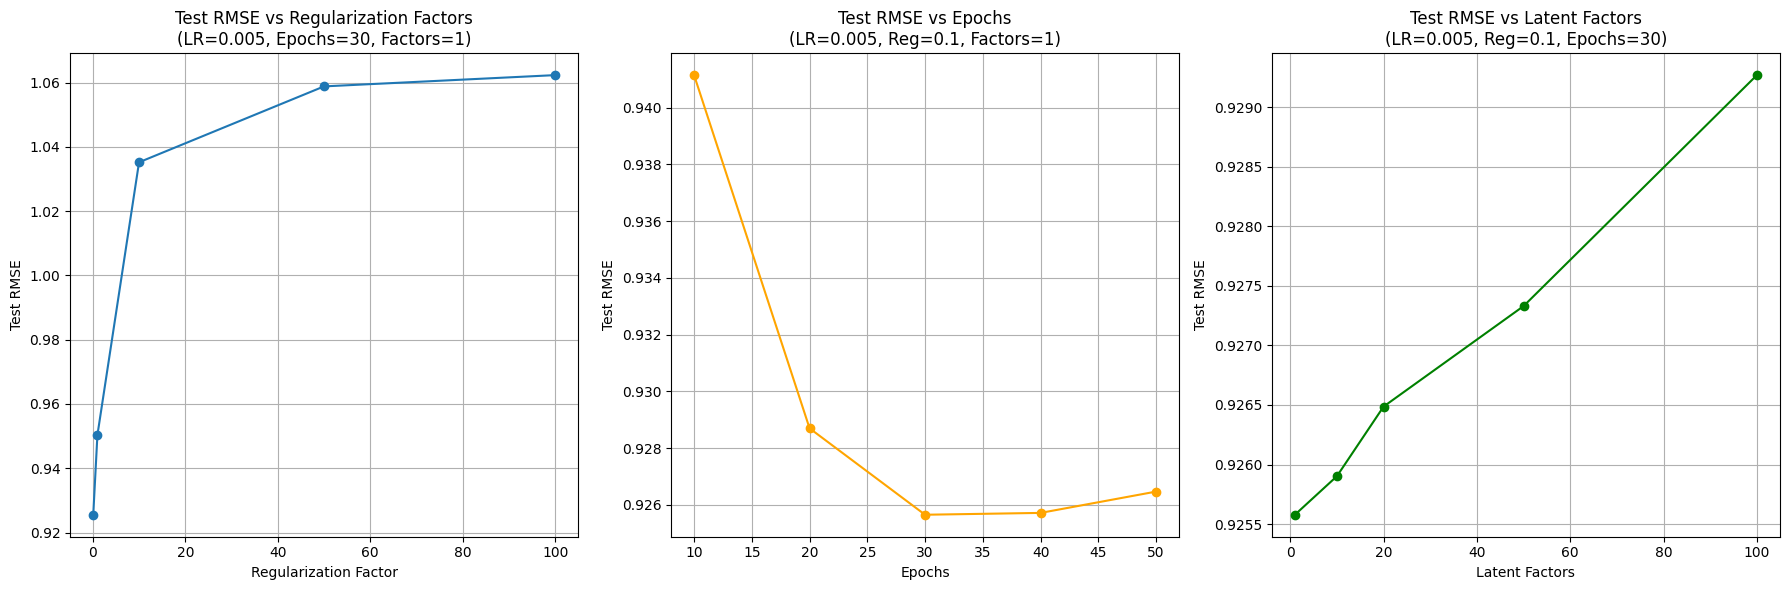

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Test RMSE vs Regularization
axs[0].plot(reg_values, rmse_reg, marker='o')
axs[0].set_xlabel('Regularization Factor')
axs[0].set_ylabel('Test RMSE')
axs[0].set_title(f'Test RMSE vs Regularization Factors\n(LR=0.005, Epochs=30, Factors=1)')
axs[0].grid()

# Plot Test RMSE vs Epochs
axs[1].plot(epoch_values, rmse_epochs, marker='o', color='orange')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Test RMSE')
axs[1].set_title(f'Test RMSE vs Epochs\n(LR=0.005, Reg=0.1, Factors=1)')
axs[1].grid()

# Plot Test RMSE vs Number of Factors
axs[2].plot(factor_values, rmse_factors, marker='o', color='green')
axs[2].set_xlabel('Latent Factors')
axs[2].set_ylabel('Test RMSE')
axs[2].set_title(f'Test RMSE vs Latent Factors\n(LR=0.005, Reg=0.1, Epochs=30)')
axs[2].grid()

plt.tight_layout()
plt.show()
